In [1]:
#imports
import numpy as np
import itertools
import copy

#for visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotLine

In [2]:
# Required Functions
# Function for converting binary array to decimal value
def binarytodecimal(binary):
    number = 0
    for b in binary:
        number = (2 * number) + b
    return number

# threshold function for network updating
def Thresh(x):
        if  x < 0: 
            val = 0
        else:
            val =  1
        return val   

In [3]:
# memory states/steady states
v1 = [1, 1, 1,-1, 1, -1, -1, 1, -1]
v2 = [1, -1, 1, 1, -1, 1, 1, 1, 1]
#v3 = [-1, -1, -1,1, -1, 1, 1, -1, 1]
#v4 = [-1, 1, -1, -1, 1, -1, -1, -1, -1]


In [4]:
V1 = [1, 1, 1, 0, 1, 0, 0, 1, 0]
V2 = [1, 0, 1, 1, 0, 1, 1, 1, 1]

print("Decimal value v1:" + str(binarytodecimal(V1)))
print("Decimal value v2:" + str(binarytodecimal(V2)))

Decimal value v1:466
Decimal value v2:367


In [5]:
memory = [v1,v2]
memory = np.array(memory)

if  memory.size > 1:
    n = memory.shape[1] 
else:
    n = len(memory)

P = len(memory)#Number of memories
N = memory.shape[1]
neurons = (N * N) #Number of neurons
init_decimal = []
final_decimal = []

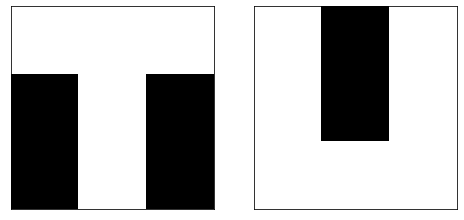

In [6]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
N_sqrt = np.sqrt(N).astype('int32')

for num, i in enumerate(memory):
    plt.subplot(1, 2, num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
    plt.xticks([]) 
    plt.yticks([])     

In [6]:
#learn the pattern / patterns
weights = (1 / memory.shape[0]) * memory.T @ memory #hebbian learning
#weights =  memory.T @ memory #hebbian learning
np.fill_diagonal(weights, 0)
print(weights)

[[ 0.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  1. -1. -1.  0. -1.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0. -1.  1.  1.  0.  1.]
 [ 0.  1.  0. -1.  0. -1. -1.  0. -1.]
 [ 0. -1.  0.  1. -1.  0.  1.  0.  1.]
 [ 0. -1.  0.  1. -1.  1.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1. -1.  1.  1.  0.  0.]]


In [7]:
#initialized states for network training
state = np.array(list(itertools.product([0, 1], repeat=9))) #create all possible 512 states
print("State 1:" + str(state[0]))
print("State 512:" + str(state[511]))

State 1:[0 0 0 0 0 0 0 0 0]
State 512:[1 1 1 1 1 1 1 1 1]


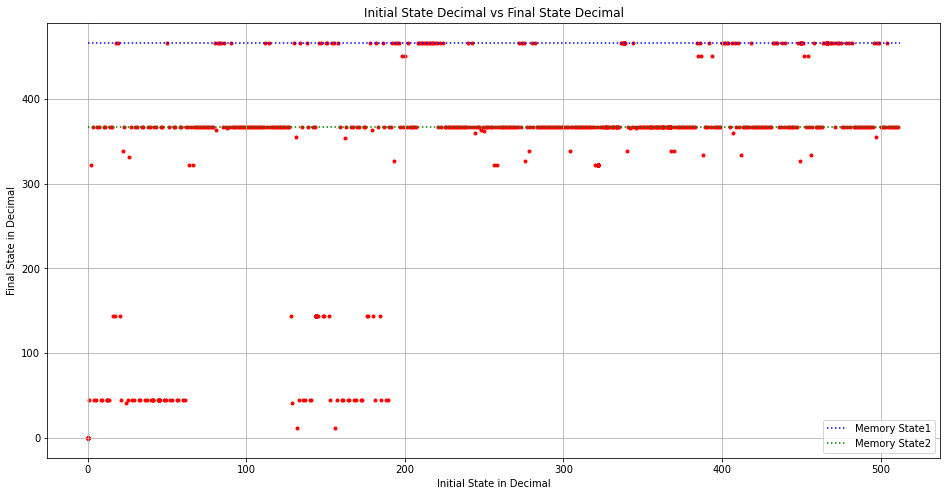

In [11]:
# Updating the network - Asynchronous updating
#print('  Initial State' + '     ' + 'Decimal'+ ' ' + '   Final State' + '      ' +'Decimal' )
#print('-------------------------------------------------------')
fig, ax1 = plt.subplots(figsize = (16, 8))
n_iters = 10
for count in range(n_iters):
    for j, test_array in enumerate(state):
        xa = copy.deepcopy(test_array)
        #print(xa,'', binatodeci(xa))

        init_decimal.append(binarytodecimal(xa))
        node_idx = list(range(N))
        np.random.shuffle(node_idx)
        for idx in node_idx:
            ic = test_array@weights[:,idx]
            #test_array[idx] = Thresh(ic)
        
            if ic < 0: 
                test_array[idx] = 0
            elif ic == 0:
                test_array[idx] = test_array[idx]
            else:
                test_array[idx] =  1      
            
        #print(test_array,'', binatodeci(test_array))
        #print(xa,'  ', binarytodecimal(xa), '  ', test_array,'  ', binarytodecimal(test_array) )

        final_decimal.append(binarytodecimal(test_array))
        #print('-------------------------------------------------------')

#plot graphs
plt.scatter(init_decimal, final_decimal, c = 'red', marker= '.')
ax1.set_xlabel("Initial State in Decimal")
ax1.set_ylabel("Final State in Decimal")
ax1.set_title("Initial State Decimal vs Final State Decimal")
plt.grid()
plotLine.hlines(binarytodecimal(V1), 0, 512, color='blue',linestyle='dotted', label = 'Memory State1')
plotLine.hlines(binarytodecimal(V2), 0, 512, color='green',linestyle='dotted',label = 'Memory State2')
plotLine.legend(loc='lower right')
plotLine.show()